# Mexico COVID-19 clinical data
<p>This daset contains the results of real-time PCR testing for COVID-19 from the [General Directorate of Epidemiology](https://www.gob.mx/salud/documentos/datos-abiertos-152127) (more details [here](href="https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico/resource/e8c7079c-dc2a-4b6e-8035-08042ed37165)).The data was gathered using a "sentinel model" that samples 10% of the patients that present a viral respiratory diagnosis to test for COVID-19, and consists of data reported by 475 viral respiratory disease monitoring units (hospitals) named USMER (Unidades Monitoras de Enfermedad Respiratoria Viral) throughout the country in the entire health sector (IMSS, ISSSTE, SEDENA, SEMAR, and others).</p>

### 1. Load the data 📈

In [41]:
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.max_columns', None) # shows all columns
warnings.filterwarnings('ignore')

In [42]:
# Read file into memory

# It's best to try first with the lastest remote file from repository
data = pd.read_csv('https://raw.githubusercontent.com/marianarf/covid19_mexico_analysis/master/mexico_covid19.csv')

# Local data
# data = pd.read_csv('../input/mexico-covid19-clinical-data/mexico_covid19.csv')

In [43]:
# Show first 5 rows
data.head(5)

,id,FECHA_ARCHIVO,ID_REGISTRO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,DELAY,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,FECHA_ACTUALIZACION,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,9269,2020-04-12,00011f,25,25,2,0,25,Sinaloa,SL,2020-04-19,2,12,2,25,13.0,1,2020-03-20,2020-03-12,9999-99-99,97,2,74,1,97,2,1,2,2,2,1,2,2,1,2,2,2,99,MÃ©xico,97,97
1,33333,2020-04-12,00014e,14,14,2,0,14,Jalisco,JC,2020-04-19,1,4,1,16,98.0,2,2020-03-30,2020-03-30,9999-99-99,2,2,71,1,2,2,1,1,2,2,1,2,2,1,2,1,99,99,MÃ©xico,97,2
2,35483,2020-04-12,000153,8,8,1,0,8,Chihuahua,CH,2020-04-19,1,4,2,8,19.0,2,2020-04-02,2020-03-24,9999-99-99,2,1,50,1,97,2,2,2,2,2,2,2,2,2,2,2,99,99,MÃ©xico,97,2
3,7062,2020-04-12,0001b6,9,15,1,0,9,Ciudad de Mexico,DF,2020-04-19,2,4,1,15,33.0,1,2020-04-01,2020-03-26,9999-99-99,97,2,25,1,2,2,2,2,2,2,2,2,2,1,2,2,99,99,MÃ©xico,97,97
4,23745,2020-04-12,0001c1,9,9,2,0,9,Ciudad de Mexico,DF,2020-04-19,1,4,1,99,15.0,1,2020-04-07,2020-04-06,9999-99-99,97,2,28,1,2,2,2,2,2,2,2,2,2,2,2,2,99,99,MÃ©xico,97,97


In [44]:
# Quick glance at the data
data.describe()

,id,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,DELAY,ENTIDAD_REGISTRO,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,UCI
count,2.630070e+05,263007.000000,263007.000000,263007.000000,263007.0,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263001.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000
mean,2.946176e+06,14.844601,15.127719,1.609672,0.0,15.092271,1.635789,9.601680,1.510682,19.691004,36.441401,1.236378,74.543362,1.842993,42.591627,1.007509,50.708825,4.579851,2.239712,2.320102,2.300711,2.359667,2.174185,2.453961,2.324980,2.184763,2.320231,2.268217,32.283764,98.593680,74.541012
std,2.212368e+06,8.001043,7.904314,0.487825,0.0,7.915406,0.481209,7.265468,0.499887,19.378113,48.117024,0.424858,40.379846,0.798979,16.903824,0.086330,47.494775,15.642049,5.958047,5.704424,5.682309,6.021830,5.745114,6.850231,5.796086,5.817362,5.722995,5.867586,45.350310,6.275497,40.384991
min,1.000000e+00,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.689635e+05,9.000000,9.000000,1.000000,0.0,9.000000,1.000000,4.000000,1.000000,9.000000,7.000000,1.000000,97.000000,2.000000,31.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,99.000000,97.000000
50%,2.733242e+06,14.000000,15.000000,2.000000,0.0,15.000000,2.000000,12.000000,2.000000,15.000000,19.000000,1.000000,97.000000,2.000000,41.000000,1.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,97.000000
75%,4.789668e+06,21.000000,21.000000,2.000000,0.0,21.000000,2.000000,12.000000,2.000000,24.000000,48.000000,1.000000,97.000000,2.000000,53.000000,1.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,99.000000,97.000000
max,7.277125e+06,32.000000,32.000000,2.000000,0.0,32.000000,2.000000,99.000000,2.000000,99.000000,999.000000,2.000000,99.000000,99.000000,120.000000,2.000000,98.000000,99.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,99.000000,99.000000


### 2. Features 🖼️
<p>We are aiming to predict whether a patient with pending COVID-19 results will get a positive or a negative result. We will use columns already factored with numeric values and will remove variables not relevant to the analysis.<p>

In [45]:
# Make a copy of the data frame so that we don't override the original dataframe
df = data.copy()

In [46]:
# Take a glance at the variables
df.keys()

Index(['id', 'FECHA_ARCHIVO', 'ID_REGISTRO', 'ENTIDAD_UM', 'ENTIDAD_RES',
       'RESULTADO', 'DELAY', 'ENTIDAD_REGISTRO', 'ENTIDAD', 'ABR_ENT',
       'FECHA_ACTUALIZACION', 'ORIGEN', 'SECTOR', 'SEXO', 'ENTIDAD_NAC',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS',
       'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'MIGRANTE',
       'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [47]:
# Check dtypes for each column
# df.dtypes

In [48]:
# Exclude features as described above
df = df[df.columns[~df.columns.isin(
    ['id', 'ID_REGISTRO',
     'FECHA_ARCHIVO', 'FECHA_ACTUALIZACION', 'FECHA_DEF', 'FECHA_INGRESO','FECHA_SINTOMAS',
     'ABR_ENT', 'ENTIDAD', 'MIGRANTE', 'NACIONALIDAD', 'ORIGEN', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN',
     'INTUBADO', 'UCI'] # remove features that are only available while hospitalized
)]]

In [49]:
# Show the number of missing (NAN, NaN, na) data for each column
# data.isnull().sum()

In [50]:
# Various ways to check for NaN, NA and NULL
# df.isnull()
# df.isnull().sum()
# df.isnull().values.any()
# df.isnull().values.sum()
# df.isnull().any()

In [51]:
# There are a few rows without the city code attribute - so let's remove them
df = df[~df.isnull().any(axis=1)]

In [52]:
# We have data that contains either negative or positive results (i.e, excludes tests that are in process)
print(df['RESULTADO'].unique())

[2 1]


In [53]:
# The original data has different codes, but let's follow convention and refactor them (0=negative, 1=positive)
df['RESULTADO'] = df['RESULTADO'].astype(str).str.replace('2','0') # negative
df['RESULTADO'] = df['RESULTADO'].astype(str).str.replace('1','1') # positive

In [54]:
# Convert whole df to numeric
df = df.apply(pd.to_numeric, errors='ignore')

In [55]:
# We want every remaining column to be of numeric type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263001 entries, 0 to 263006
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ENTIDAD_UM          263001 non-null  int64  
 1   ENTIDAD_RES         263001 non-null  int64  
 2   RESULTADO           263001 non-null  int64  
 3   DELAY               263001 non-null  int64  
 4   ENTIDAD_REGISTRO    263001 non-null  int64  
 5   SECTOR              263001 non-null  int64  
 6   SEXO                263001 non-null  int64  
 7   ENTIDAD_NAC         263001 non-null  int64  
 8   MUNICIPIO_RES       263001 non-null  float64
 9   TIPO_PACIENTE       263001 non-null  int64  
 10  NEUMONIA            263001 non-null  int64  
 11  EDAD                263001 non-null  int64  
 12  EMBARAZO            263001 non-null  int64  
 13  HABLA_LENGUA_INDIG  263001 non-null  int64  
 14  DIABETES            263001 non-null  int64  
 15  EPOC                263001 non-nul

### 3. Model 🤖
<p>We are aiming to predict whether a patient with pending COVID-19 results will get a positive or a negative result:</p>

<ul>
<li>As laboratory results are processed, each pending patient record leaves a time window when it's uncertain whether a result will return positive or negative (so we can validate almost daily if predictions are wrong or right, as laboratory results are reported in the new reports).</li>
<li>Also, this could help predict for similar symptoms e.g. from a survey or an app that checks for similar data (ideally, containing most of the parameters that can be assessed without coming into the hospital, like e.g. age of the patient)</li>
</ul>

<p>The value of the lab result comes from a RT-PCR, and is stored in <code>RESULTADO</code>, where <code>0 = NEGATIVE</code> and <code>1 = POSITIVE</code>. Let's rename this to <code>target</code> so that it's more convenient to work with.</p>

In [56]:
# Rename target column as 'target' for clarity
df.rename(
    columns={'RESULTADO': 'target'},
    inplace=True
)

In [57]:
# Remove target variable to move it to the first position of dataframe
col_name = 'target'
first_col = df.pop(col_name)

In [58]:
# Now we can use Pandas insert() function and insert the opped column into first position of the dataframe
# The first argument of insert() function is the location we want to insert, here it is 0
df.insert(0, col_name, first_col)

In [59]:
# Now response variable is at the start of the data frame
df.head()

,target,ENTIDAD_UM,ENTIDAD_RES,DELAY,ENTIDAD_REGISTRO,SECTOR,SEXO,ENTIDAD_NAC,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,EDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO
0,0,25,25,0,25,12,2,25,13.0,1,2,74,97,2,1,2,2,2,1,2,2,1,2,2,2
1,0,14,14,0,14,4,1,16,98.0,2,2,71,2,2,1,1,2,2,1,2,2,1,2,1,99
2,1,8,8,0,8,4,2,8,19.0,2,1,50,97,2,2,2,2,2,2,2,2,2,2,2,99
3,1,9,15,0,9,4,1,15,33.0,1,2,25,2,2,2,2,2,2,2,2,2,1,2,2,99
4,0,9,9,0,9,4,1,99,15.0,1,2,28,2,2,2,2,2,2,2,2,2,2,2,2,99


In [60]:
# Let's see how many observations and features we have
df.shape

(263001, 25)

### 3.1 Explore features 🔬

### 3.1.1 Correlation Matrix 📐

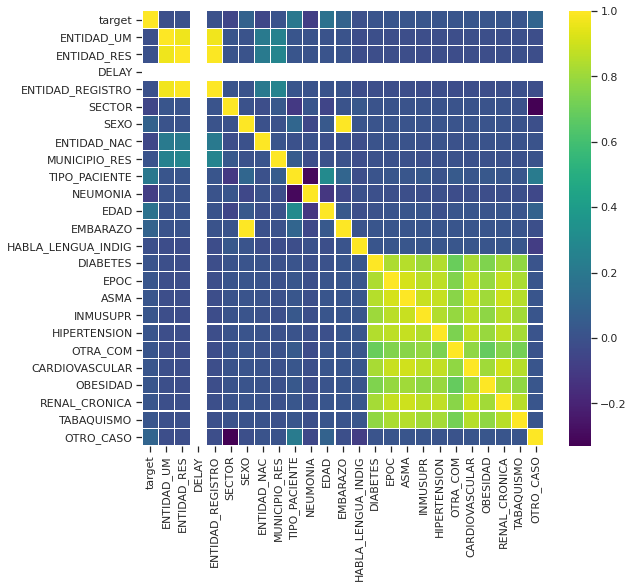

In [61]:
import seaborn as sns 
import matplotlib.pyplot as plt

corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax=ax, cmap='viridis', linewidths = 0.1)

> ### 3.1.2 Target incidence 🎯
<p>Target incidence is the number of cases of each individual target value in the data. It represents the proportion of categorical variable in a target column. Target incidence gives us an idea of how balanced (imbalanced) is our data.</p>

In [62]:
# Print target incidence proportions and round to 3 decimal places
df.target.value_counts(normalize=True).round(3)

0    0.61
1    0.39
Name: target, dtype: float64

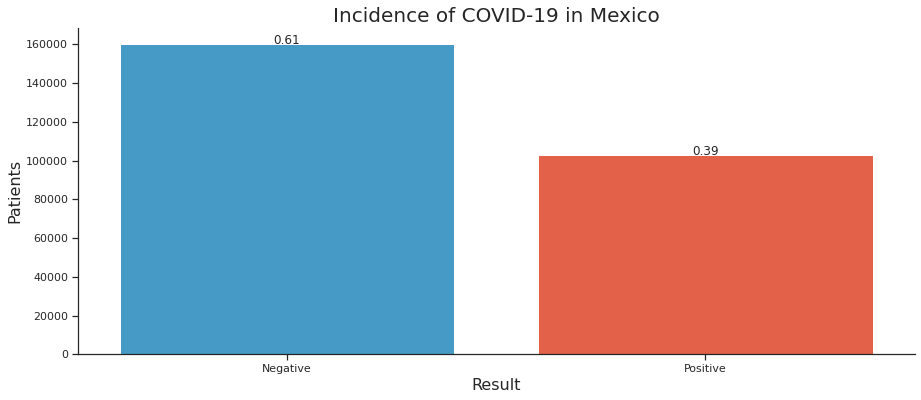

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,6))

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

five_thirty_eight = [
    '#30a2da',
    '#fc4f30',
    '#e5ae38',
    '#6d904f',
    '#8b8b8b',
]

sns.set_palette(sns.color_palette(five_thirty_eight))

total = float(len(data))
results = ['Negative', 'Positive']  
ax = sns.countplot(x='target', data=df)
ax.set_xticklabels(results)

# add percentages above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            p.get_height(),
            '{:1.2f}'.format(height/total),
            ha='center')
    
plt.title('Incidence of COVID-19 in Mexico', fontsize=20)
plt.xlabel('Result')
plt.ylabel('Patients')

sns.set(style='ticks')
sns.despine()

### 3.1.3 Age distribution of cases for each category 🕵️

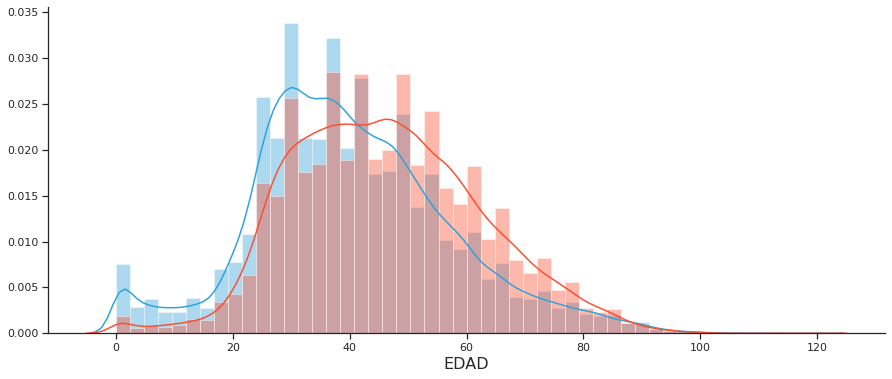

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

df_positive = df.loc[df['target'] == 0]
df_negative = df.loc[df['target'] == 1]

five_thirty_eight = [
    '#30a2da',
    '#fc4f30',
    '#e5ae38',
    '#6d904f',
    '#8b8b8b',
]

plt.figure(figsize = (15,6))
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

sns.set_palette(sns.color_palette(five_thirty_eight))

sns.distplot(df_positive['EDAD'])
sns.distplot(df_negative['EDAD'])

sns.set(style='ticks')
sns.despine()

### 3.1.4 Class imbalance for each feature 📊

<Figure size 432x288 with 0 Axes>

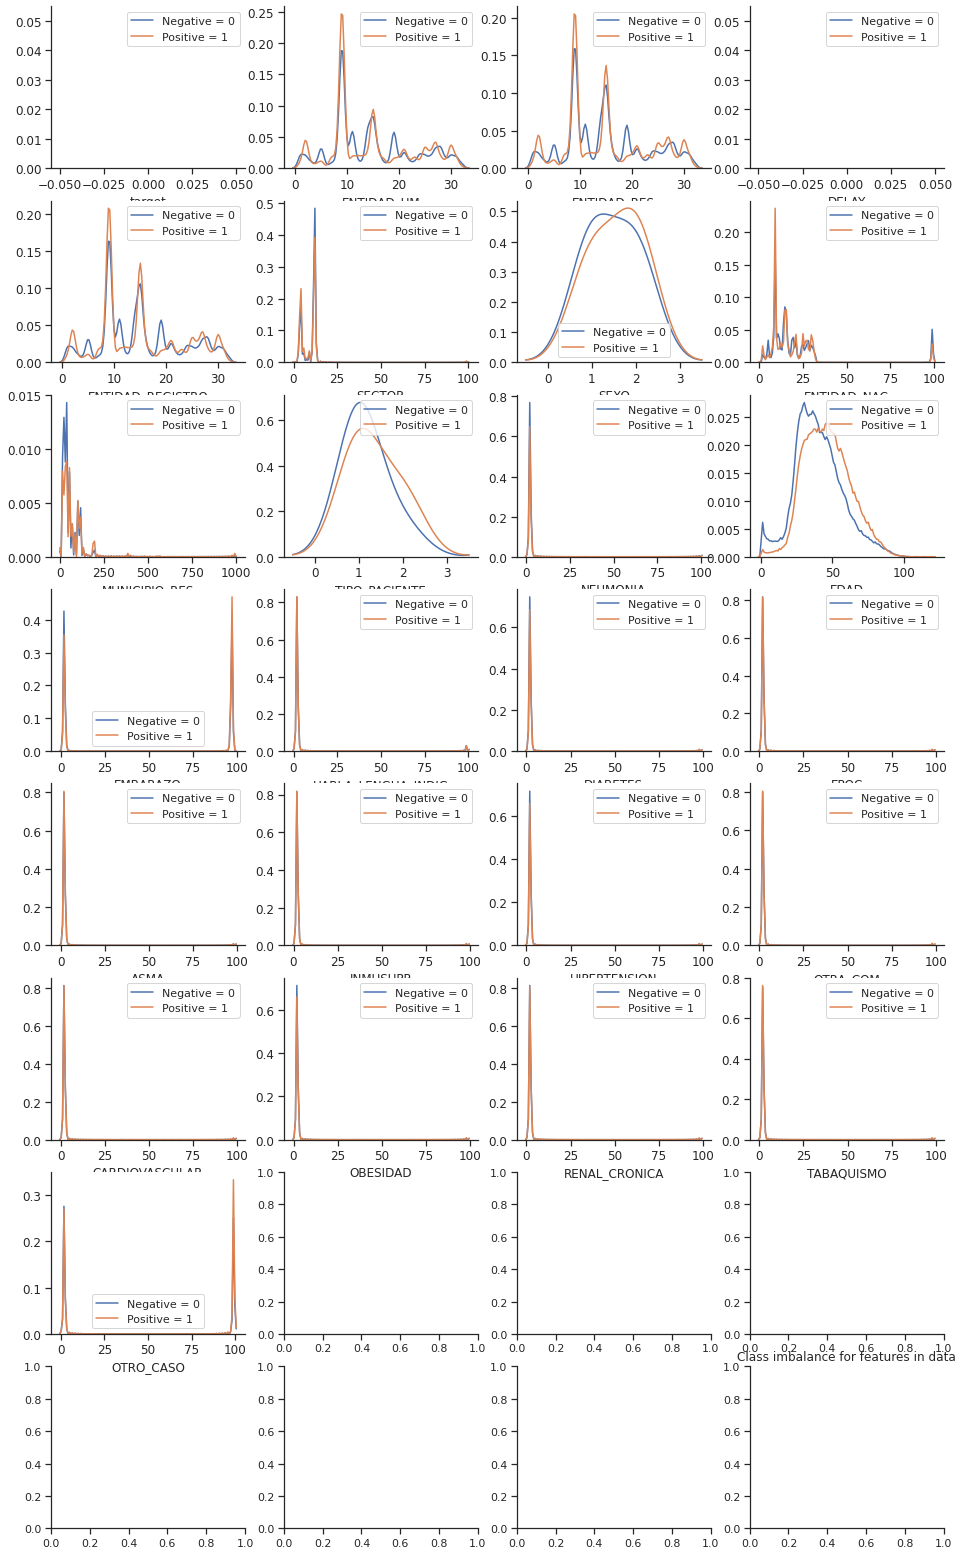

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

five_thirty_eight = [
    '#30a2da',
    '#fc4f30',
    '#e5ae38',
    '#6d904f',
    '#8b8b8b',
]
    
var = df.columns.values

i = 0
t0 = df.loc[df['target'] == 0]
t1 = df.loc[df['target'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))
plt.title('Class imbalance for features in data')

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5, label="Negative = 0")
    sns.kdeplot(t1[feature], bw=0.5, label="Positive = 1")
    sns.set_palette(sns.color_palette(five_thirty_eight))
    sns.set(style='ticks')
    sns.despine()
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

### 3.2 Binary classification
<p>We want to predict whether or not a person with a certain clinical profile may result COVID-19 positive when tested for a real-time PCR. The model for this is a binary classifier, meaning that there are only 2 possible outcomes:</p>

<ul>
    <li><code>0</code> - the lab result is COVID-19 negative</li>
    <li><code>1</code> - the lab result is COVID-19 positive</li>
</ul>

<p>1. As laboratory results are processed, each pending patient record leaves a time window when it's uncertain whether a result will return positive or negative (so we can validate almost daily if predictions are wrong or right, as laboratory results are reported in the new reports).</p>

<p>2. Also, this could help predict for similar symptoms e.g. from a survey or an app that checks for similar data (ideally, containing most of the parameters that can be assessed without coming into the hospital, like e.g. age of the patient).</p>

### 3.2.1 Split the dataset

In [66]:
from sklearn.model_selection import train_test_split

X = df.drop('target',axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3.2.2 Models and hyperparameters
<p>This section is adapted from [this post by Gabriel Naya](https://towardsdatascience.com/available-hyperparameter-optimization-techniques-dc60fb836264) on hyperparameter optimization with the following optimization techniques:<p>
    
<ul>
    <li>Default hyperparameters</li>
    <li>Sklearn GridSearchCV</li>
    <li>Sklearn RandomizedSearchCV</li>
    <li>Hyperopt for Python</li>
</ul>

In [67]:
# First create dataframe to store the results
cols = ['Case','RndForest','LogReg','LGB']
result_tbl = pd.DataFrame(columns=cols)
result_tbl.set_index('Case',inplace=True)
result_tbl.loc['Standard'] = [0,0,0]
result_tbl.loc['GridSearch'] = [0,0,0]
result_tbl.loc['RandomSearch'] = [0,0,0]
result_tbl.loc['Hyperopt'] = [0,0,0]
result_tbl.head()

,RndForest,LogReg,LGB
Case,,,
Standard,0,0,0
GridSearch,0,0,0
RandomSearch,0,0,0
Hyperopt,0,0,0


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Instantiate models with default parameters

rf    = RandomForestClassifier(n_estimators=10)
lr    =  LogisticRegression(solver='liblinear')
lgg   = lgb.LGBMClassifier()
models = [rf,lr,lgg]

col = 0

for model in models:
    model.fit(X_train,y_train.values.ravel())
    result_tbl.iloc[0,col] = model.score(X_test,y_test)
    col += 1
result_tbl.head()

,RndForest,LogReg,LGB
Case,,,
Standard,0.657051,0.656709,0.701956
GridSearch,0,0,0
RandomSearch,0,0,0
Hyperopt,0,0,0


In [ ]:
# Parameters for GridSearchCV

# Random Forest
n_estimators = [10, 100, 1000,10000]
max_features = ['sqrt', 'log2']
rf_grid = dict(n_estimators=n_estimators, max_features=max_features)

# Logistic Regrresion
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_grid = dict(solver=solvers, penalty=penalty, C=c_values)

# LGB
scale_pos_weight = (161217/103095) # change this to not-manual input -_- pls
boosting_type = ['gbdt', 'goss', 'dart']
num_leaves = [30,50,100,150] #list(range(30, 150)),
learning_rate = list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 10)) #1000
lgg_grid = dict(scale_pos_weight=scale_pos_weight, boosting_type=boosting_type, num_leaves=num_leaves, learning_rate=learning_rate)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# This configuration depends on one's computing capacity and scope of time.
# The parameters in the previous cell are only some parameters available for the models.
# I haven't figured how to use GPU for the following optimization techniques, so I will use LightXGB.

models = [rf,lr,lgg]
grids = [rf_grid,lr_grid,lgg_grid]

col = 0
for ind in range(0,len(models)):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, 
                                 random_state=1)
    grid_search = GridSearchCV(estimator=models[col], 
                  param_grid=grids[col], n_jobs=-1, cv=cv,  
                  scoring='accuracy',error_score=0)
    grid_clf_acc = grid_search.fit(X_train, y_train)
    result_tbl.iloc[1,col] = grid_clf_acc.score(X_test,y_test)
    col += 1
result_tbl.head()

In [ ]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

# This configuration depends on one's computing capacity and scope of time.
# The parameters in the previous cell are only some parameters available for the models.
# I haven't figured how to use GPU for the following optimization techniques, so I will use LightXGB.

models = [rf,lr,lgg]
grids = [rf_grid,lr_grid,lgg_grid]

col = 0
for ind in range(0,len(models)):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, 
                                 random_state=1)
    n_iter_search = 3
    random_search = RandomizedSearchCV(models[col],
    param_distributions=grids[col],n_iter=n_iter_search, cv=cv)
    random_search.fit(X_train,y_train)
    result_tbl.iloc[2,col] = random_search.score(X_test, y_test)
    col += 1
result_tbl.head()

### 4. LightXGB model
<p>Since I couldn't use the GPU and it will take a long time to perform the hyperparameter optimization, I opted to use LightXGB with the base parameters. Imo there's no much use in performing these steps before having a good baseline model with the correct feature engineering but I will leave the code if someone wants to try it out with different algorithms!</p>

### 4.1 Train

In [69]:
import lightgbm as lgb

# Instantiate model

lgg = lgb.LGBMClassifier()
lgg.fit(X_train,y_train.values.ravel())
print(lgg.score(X_test,y_test))

0.7019556152646989


In [70]:
# Predict the results
y_hat = lgg.predict(X_test)

### 4.2 Performance metrics

In [71]:
from sklearn.metrics import accuracy_score

# View accuracy
accuracy = accuracy_score(y_hat, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_hat)))

LightGBM Model accuracy score: 0.7020


In [72]:
# Compare train and test set accuracy
y_hat_train = lgg.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_hat_train)))

Training-set accuracy score: 0.7101


In [73]:
# Check for overfitting
print('Training set score: {:.4f}'.format(lgg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(lgg.score(X_test, y_test)))

Training set score: 0.7101
Test set score: 0.7020


In [74]:
from sklearn.metrics import classification_report

# Classification metrics
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77     47890
           1       0.66      0.49      0.56     31011

    accuracy                           0.70     78901
   macro avg       0.69      0.66      0.67     78901
weighted avg       0.70      0.70      0.69     78901



In [75]:
from sklearn.metrics import confusion_matrix

# Confussion matrix
cm = confusion_matrix(y_test, y_hat)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[40184  7706]
 [15810 15201]]

True Positives(TP) =  40184

True Negatives(TN) =  15201

False Positives(FP) =  7706

False Negatives(FN) =  15810


### 4.3 Too many false negatives! 🤔
<p>Since this model is meant to build for diagnostic, it's very dangerous to have that many false negatives. Let's explore ROC metrics to have a better understanding of what's going on.</p>

In [76]:
# Calculate probability again
y_hat = lgg.predict_proba(X_test) # Use this instead of `predict()`so that we can retrieve probabilities
pos_probs = y_hat[:,1] # Retrieve just the probabilities for the positive class

### 4.3.1 ROC Curve

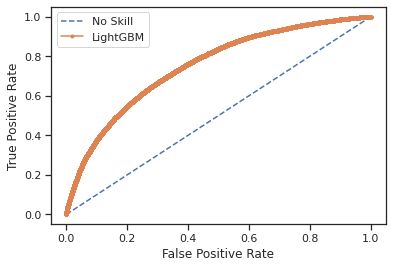

In [77]:
from sklearn.metrics import roc_curve

# Plot No Skill ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# Calculate ROC Curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)

# Plot model ROC Curve
plt.plot(fpr, tpr, marker='.', label='LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### 4.3.2 ROC AUC Curve

In [78]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score

# Create No Skill classifier
dummy_model = DummyClassifier(strategy='stratified')
dummy_model.fit(X_train, y_train)
y_hat_dummy = dummy_model.predict_proba(X_test)
pos_probs_dummy = y_hat_dummy[:, 1]

# Calculate ROC AUC for No Skill
roc_auc = roc_auc_score(y_test, pos_probs_dummy)
print('No Skill ROC AUC %.3f' % roc_auc)

# Calculate ROC AUC for our model
roc_auc = roc_auc_score(y_test, pos_probs)
print('LightGBM ROC AUC %.3f' % roc_auc)

No Skill ROC AUC 0.500
LightGBM ROC AUC 0.752


### 4.3.3 Precision-Recall Curve

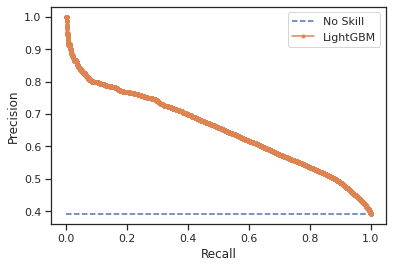

In [79]:
from sklearn.metrics import precision_recall_curve

# Calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1])/len(y)

# Plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# Calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)

# Plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='LightGBM')

# Calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)

# Call the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [80]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Calculate the Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, pos_probs_dummy)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)

# Calculate the Precision-Recall AUC for our model
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
auc_score = auc(recall, precision)
print('LightGBM PR AUC: %.3f' % auc_score)

No Skill PR AUC: 0.511
LightGBM PR AUC: 0.653


### 5. Conclusion and notes for further analysis
<p>We have explored the data, plotted some features and tried a binary classification model. While the preliminary performance scores aren't all that discouraging, this is meant to be only a starting point to expand upon the model. Further analysis may add features most importantly to optimize for the confusion matrix, crucially, in regards for the false negative results, which in this case is at the most center of improvement.</p>

<center>Stay safe and I hope this effort is helpful! 🙋‍♀️🌎</center>